In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("New Dataset 5000.csv")

In [3]:
data

StationId         Datetime  PM2.5    PM10     NO     NO2    NOx    NH3  \
0        TG002   5/14/2018 0:00  35.25   88.50   2.12   33.10  19.30  14.10   
1        TG002   5/14/2018 1:00  32.00   73.50   2.17   20.30  12.60  13.80   
2        TG002   5/14/2018 2:00  20.50   58.00   3.00   17.35  11.65  13.48   
3        TG002   5/14/2018 3:00  21.00   50.00   2.73   18.28  11.93  13.50   
4        TG002   5/14/2018 4:00  18.50   43.50   2.20   16.38  10.45  15.13   
...        ...              ...    ...     ...    ...     ...    ...    ...   
5086     TG002  1/31/2019 19:00  40.75   93.75   3.55   91.53  51.58  17.98   
5087     TG002  1/31/2019 20:00  64.25  151.75   4.97  121.20  68.53  21.15   
5088     TG002  1/31/2019 21:00  82.25  179.50  17.82  142.17  90.10  20.10   
5089     TG002  1/31/2019 22:00  78.25  165.00  22.60  144.02  94.95  20.75   
5090     TG002  1/31/2019 23:00  75.50  160.75  12.47  134.22  81.55  21.70   

        CO   SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0     0.96  1.97  67.25     4.98     7.43    2.70  168   Moderate  
1     0.17  2.77  80.75     3.40     4.27    1.57  124   Moderate  
2     1.53  2.95  77.22     2.02     2.55    1.18  124   Moderate  
3     2.96  2.02  36.35     1.42     1.57    0.80  124   Moderate  
4     3.49  2.20  70.90     1.20     1.10    1.03  124   Moderate  
...    ...   ...    ...      ...      ...     ...  ...        ...  
5086  0.87  3.45  42.12     3.30     7.35    3.00  106   Moderate  
5087  1.21  3.00  13.75     6.22    16.48    8.20  106   Moderate  
5088  1.48  4.05   2.42     8.55    23.40   12.93  106   Moderate  
5089  1.45  3.97   1.20     9.62    24.93   15.65  107   Moderate  
5090  1.29  2.00   4.97     9.65    22.52   15.62  108   Moderate  

[5091 rows x 16 columns]

In [4]:
df = data.drop(['StationId', 'Datetime', 'PM2.5', 'PM10', 'AQI_Bucket'], axis=1)

In [5]:
df.tail()

NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  Toluene  \
5086   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30     7.35   
5087   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22    16.48   
5088  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55    23.40   
5089  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62    24.93   
5090  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65    22.52   

      Xylene  AQI  
5086    3.00  106  
5087    8.20  106  
5088   12.93  106  
5089   15.65  107  
5090   15.62  108

In [6]:
df.columns=['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  Toluene  \
5086   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30     7.35   
5087   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22    16.48   
5088  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55    23.40   
5089  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62    24.93   
5090  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65    22.52   

      Xylene  AQI  
5086    3.00  106  
5087    8.20  106  
5088   12.93  106  
5089   15.65  107  
5090   15.62  108

In [7]:
X = df.loc[:, 'NO':'Xylene'].values
y = df['AQI'].values

In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [9]:
# COvariance matrix

import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00019646  0.33629993  0.60819     0.12478496  0.33434546  0.06893179
  -0.17353783  0.35952751  0.29052589  0.39498179]
 [ 0.33629993  1.00019646  0.95180691  0.56778598  0.62938985  0.41621007
  -0.06808116  0.7453067   0.6095303   0.70238404]
 [ 0.60819     0.95180691  1.00019646  0.51820875  0.64131299  0.37264625
  -0.11185871  0.74574032  0.60837258  0.72126447]
 [ 0.12478496  0.56778598  0.51820875  1.00019646  0.43778267  0.31927145
   0.30422181  0.59247188  0.47082993  0.35179404]
 [ 0.33434546  0.62938985  0.64131299  0.43778267  1.00019646  0.1846075
   0.09574923  0.56839049  0.45755021  0.53172383]
 [ 0.06893179  0.41621007  0.37264625  0.31927145  0.1846075   1.00019646
   0.24319169  0.41650239  0.38614127  0.17990277]
 [-0.17353783 -0.06808116 -0.11185871  0.30422181  0.09574923  0.24319169
   1.00019646  0.00348086 -0.03954711 -0.1388311 ]
 [ 0.35952751  0.7453067   0.74574032  0.59247188  0.56839049  0.41650239
   0.00348086  1.00019646  0.8665

In [10]:
# Eigen Vector and eigen values on standarized data x // covariance matrix

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01  3.89778417e-01 -2.40704428e-01 -3.85584476e-01
   6.25111175e-01 -2.10257008e-02  8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01  1.84027550e-02 -6.24942354e-01  2.32660343e-02
  -1.71146979e-02 -1.05291558e-02 -4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01  1.41700392e-01  7.42618419e-01 -1.07607082e-01
   1.87715293e-01 -1.14617198e-02 -3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01 -3.79954398e-01  2.65502669e-03 -1.97385887e-01
  -2.30770763e-01 -1.43396196e-01  3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01 -1.29291446e-02 -2.30486922e-03 -4.56546556e-01
  -1.62930769e-01 -2.57750261e-02  1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01 -4.10866915e-01  8.41526849e-04  4.90635326e-01
   6.06265034e-01 -5.66568417e-02  3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [11]:
# Eigen value and vector on correlation matrix

cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01  3.89778417e-01 -2.40704428e-01 -3.85584476e-01
   6.25111175e-01 -2.10257008e-02  8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01  1.84027550e-02 -6.24942354e-01  2.32660343e-02
  -1.71146979e-02 -1.05291558e-02 -4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01  1.41700392e-01  7.42618419e-01 -1.07607082e-01
   1.87715293e-01 -1.14617198e-02 -3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01 -3.79954398e-01  2.65502669e-03 -1.97385887e-01
  -2.30770763e-01 -1.43396196e-01  3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01 -1.29291446e-02 -2.30486922e-03 -4.56546556e-01
  -1.62930769e-01 -2.57750261e-02  1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01 -4.10866915e-01  8.41526849e-04  4.90635326e-01
   6.06265034e-01 -5.66568417e-02  3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [12]:
# eigen value on original x

cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01  3.89778417e-01 -2.40704428e-01 -3.85584476e-01
   6.25111175e-01 -2.10257008e-02  8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01  1.84027550e-02 -6.24942354e-01  2.32660343e-02
  -1.71146979e-02 -1.05291558e-02 -4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01  1.41700392e-01  7.42618419e-01 -1.07607082e-01
   1.87715293e-01 -1.14617198e-02 -3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01 -3.79954398e-01  2.65502669e-03 -1.97385887e-01
  -2.30770763e-01 -1.43396196e-01  3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01 -1.29291446e-02 -2.30486922e-03 -4.56546556e-01
  -1.62930769e-01 -2.57750261e-02  1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01 -4.10866915e-01  8.41526849e-04  4.90635326e-01
   6.06265034e-01 -5.66568417e-02  3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [13]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [14]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.197067527993019
1.4790219555014197
0.8307450519490805
0.7509509109251076
0.5636988437019086
0.4969229973353462
0.37560800277983125
0.2159123202437456
0.0896224116810134
0.0004499778895284624


In [15]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

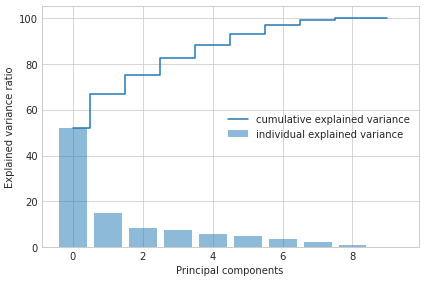

In [16]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(10), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(10), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [17]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1),
                      eig_pairs[1][1].reshape(10,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.21940992  0.38977842]
 [-0.39662239  0.01840276]
 [-0.40576223  0.14170039]
 [-0.28396081 -0.3799544 ]
 [-0.31479122 -0.01292914]
 [-0.20157312 -0.41086692]
 [ 0.00156891 -0.68575153]
 [-0.40044602 -0.04296907]
 [-0.35198061 -0.03194383]
 [-0.35397483  0.20295094]]


In [18]:
Y = X_std.dot(matrix_w)
Y

array([[-0.19765723, -0.5380899 ],
       [ 1.21126969, -0.93313901],
       [ 0.41448767, -0.84852628],
       ...,
       [-6.73630432,  2.48391753],
       [-7.47823741,  2.92194657],
       [-6.45570324,  2.19190377]])

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [20]:
data = pd.DataFrame(Y, columns=['col1', 'col2'])


In [21]:
data

col1      col2
0    -0.197657 -0.538090
1     1.211270 -0.933139
2     0.414488 -0.848526
3    -0.606004  0.056695
4    -1.009638 -0.875476
...        ...       ...
5086 -1.835952  0.170261
5087 -4.307215  1.096530
5088 -6.736304  2.483918
5089 -7.478237  2.921947
5090 -6.455703  2.191904

[5091 rows x 2 columns]

In [22]:
X= data.values
y = df['AQI'].values

In [23]:
X.shape

(5091, 2)

In [24]:
y.shape

(5091,)

In [25]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4072, 2)
(4072,)
(1019, 2)
(1019,)


In [27]:
sc=StandardScaler()

scaler = sc.fit(X_train)

trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# create DNN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=3, input_dim=2, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
history = model.fit(trainX_scaled, y_train, validation_data=(testX_scaled, y_test), epochs=100, batch_size=10)


Epoch 1/100
408/408 [==============================] - 1s 1ms/step - loss: 2071.6807 - val_loss: 546.6207
Epoch 2/100
408/408 [==============================] - 0s 1ms/step - loss: 528.0067 - val_loss: 507.6232
Epoch 3/100
408/408 [==============================] - 0s 1ms/step - loss: 496.6070 - val_loss: 481.7289
Epoch 4/100
408/408 [==============================] - 0s 1ms/step - loss: 474.6205 - val_loss: 465.9658
Epoch 5/100
408/408 [==============================] - 0s 1ms/step - loss: 455.8077 - val_loss: 463.6418
Epoch 6/100
408/408 [==============================] - 0s 1ms/step - loss: 444.7870 - val_loss: 447.0379
Epoch 7/100
408/408 [==============================] - 0s 1ms/step - loss: 434.0187 - val_loss: 441.2493
Epoch 8/100
408/408 [==============================] - 0s 999us/step - loss: 424.6451 - val_loss: 439.7926
Epoch 9/100
408/408 [==============================] - 0s 1ms/step - loss: 417.4649 - val_loss: 419.2894
Epoch 10/100
408/408 [==============================

408/408 [==============================] - 0s 1ms/step - loss: 405.7477 - val_loss: 415.6487
Epoch 79/100
408/408 [==============================] - 0s 995us/step - loss: 400.1056 - val_loss: 413.0450
Epoch 80/100
408/408 [==============================] - 0s 1ms/step - loss: 407.6102 - val_loss: 413.2183
Epoch 81/100
408/408 [==============================] - 0s 1ms/step - loss: 401.2249 - val_loss: 411.4797
Epoch 82/100
408/408 [==============================] - 0s 1ms/step - loss: 403.3289 - val_loss: 411.6667
Epoch 83/100
408/408 [==============================] - 0s 1ms/step - loss: 406.4890 - val_loss: 423.3397
Epoch 84/100
408/408 [==============================] - 0s 1ms/step - loss: 404.7285 - val_loss: 414.4713
Epoch 85/100
408/408 [==============================] - 0s 1ms/step - loss: 401.0300 - val_loss: 459.7233
Epoch 86/100
408/408 [==============================] - 0s 1ms/step - loss: 404.7551 - val_loss: 416.0219
Epoch 87/100
408/408 [==============================] - 0

In [48]:
model.evaluate(testX_scaled, y_test)

32/32 [==============================] - 0s 444us/step - loss: 414.3222


414.3221740722656

In [49]:
Predictions = model.predict(testX_scaled)  # Flatten the predictions


In [50]:
df_testY = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(Predictions)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

Actual   Predicted
0         59   85.175682
1         65   88.394508
2         45   53.194115
3        142  123.139412
4        126  111.378914
...      ...         ...
1014     139  126.163986
1015      45   46.229797
1016      94  118.340820
1017      60   85.154419
1018      36   61.488182

[1019 rows x 2 columns]

In [51]:
APE = 100 * (abs(df_results['Actual'] - df_results['Predicted']) / df_results['Actual'])
df_results['APE'] = APE

# Calculate the accuracy of the ANN model
accuracy = 100 - np.mean(APE)
print('The Accuracy of ANN model is:', accuracy)
df_results.head()

The Accuracy of ANN model is: 79.30229089614637


Actual   Predicted        APE
0      59   85.175682  44.365563
1      65   88.394508  35.991551
2      45   53.194115  18.209144
3     142  123.139412  13.282104
4     126  111.378914  11.604037

In [45]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, Predictions))
print('r2 score :', r2_score(y_test, Predictions))


Mean Absolute Error: 15.093825526513577
Mean Squared Error: 409.6822128850611
Root Mean Squared Error: 20.24060801668421
Mean Absolute Percentage Error: 0.20787133487405404
r2 score : 0.7457894897183814


In [50]:
# Defining a function to find the best parameters for ANN
# Force TensorFlow to use the GPU
tf.config.experimental.list_physical_devices('GPU')

def FunctionFindBestParams(X_train, y_train, X_test, y_test):

    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 20, 30, 40]
    epoch_list  =   [10, 50, 100, 200, 2000]

    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create DNN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=3, input_dim=2, kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            # after the first layer we don't have to specify input_dim as keras configure it automatically
            model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))

            model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='linear'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)

            SearchResultsData = pd.concat([SearchResultsData, pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]], columns=['TrialNumber', 'Parameters', 'Accuracy'])], ignore_index=True)

    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

32/32 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 10 Accuracy: 32.901019541092666
32/32 [==============================] - 0s 2ms/step
2 Parameters: batch_size: 5 - epochs: 50 Accuracy: 33.09641467171366
32/32 [==============================] - 0s 2ms/step
3 Parameters: batch_size: 5 - epochs: 100 Accuracy: 31.007164936255748
32/32 [==============================] - 0s 2ms/step
4 Parameters: batch_size: 5 - epochs: 200 Accuracy: 32.75132682130857
32/32 [==============================] - 0s 2ms/step
5 Parameters: batch_size: 5 - epochs: 2000 Accuracy: 33.03747028393066
32/32 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 36.146859740739544
32/32 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 34.52920714525666
32/32 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 33.68408108575791
32/32 [======

<Axes: xlabel='Parameters'>

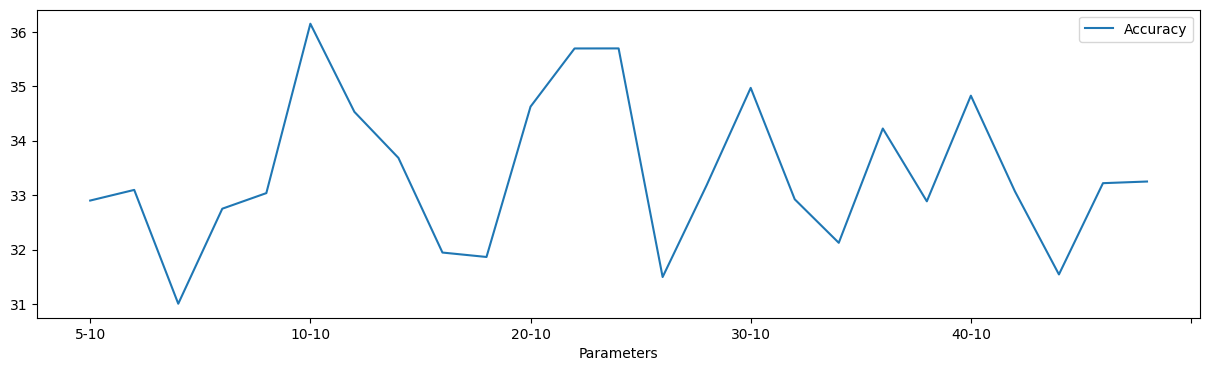

In [51]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [64]:
# Fitting the ANN to the Training set
history = model.fit(trainX_scaled, y_train ,batch_size = 20, epochs = 100, validation_data=(testX_scaled, y_test), verbose=0)

# Generating Predictions on testing data
Predictions = model.predict(testX_scaled)  # Flatten the predictions


32/32 [==============================] - 0s 2ms/step


In [65]:
df_testY = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(Predictions)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

Actual   Predicted
0         59   80.149368
1         65   87.582870
2         45   53.566525
3        142  124.812431
4        126  110.185371
...      ...         ...
1014     139  126.552940
1015      45   44.529530
1016      94  121.094208
1017      60   84.201920
1018      36   62.020649

[1019 rows x 2 columns]

In [66]:
APE = 100 * (abs(df_results['Actual'] - df_results['Predicted']) / df_results['Actual'])
df_results['APE'] = APE

# Calculate the accuracy of the ANN model
accuracy = 100 - np.mean(APE)
print('The Accuracy of ANN model is:', accuracy)
df_results.head()

The Accuracy of ANN model is: 79.4315358855667


Actual   Predicted        APE
0      59   80.149368  35.846387
1      65   87.582870  34.742878
2      45   53.566525  19.036721
3     142  124.812431  12.103922
4     126  110.185371  12.551293

In [67]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, Predictions))
print('r2 score :', r2_score(y_test, Predictions))


Mean Absolute Error: 14.966689827631688
Mean Squared Error: 400.2960635775744
Root Mean Squared Error: 20.007400220357827
Mean Absolute Percentage Error: 0.205684641144333
r2 score : 0.7516136571583896


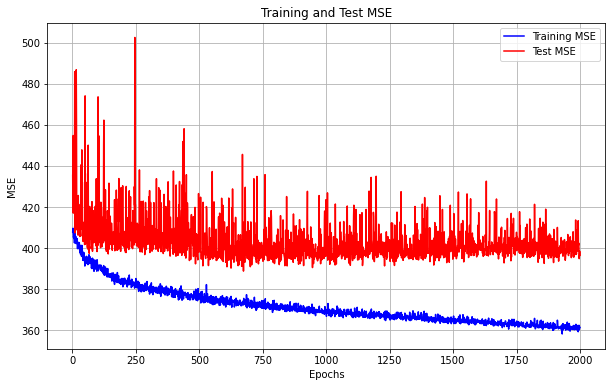

In [52]:
history = model.fit(trainX_scaled, y_train, batch_size=5, epochs=2000, verbose=0, validation_data=(testX_scaled, y_test))

train_mse = history.history['loss']
test_mse = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_mse) + 1)

# Plotting the MSE for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, test_mse, 'r', label='Test MSE')
plt.title('Training and Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

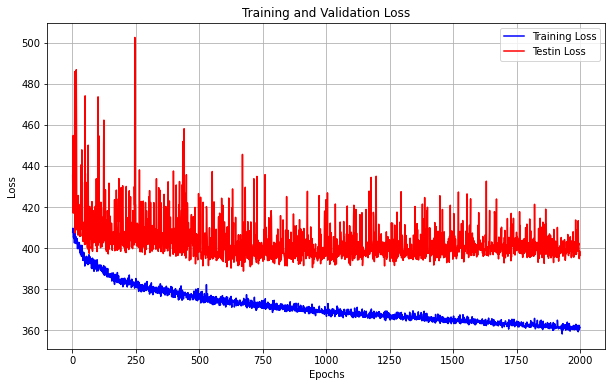

In [53]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the loss for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Testin Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

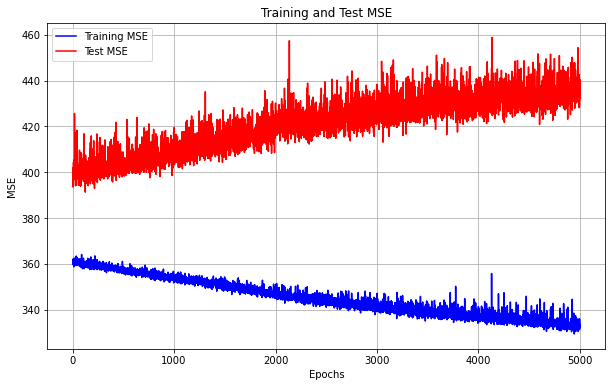

In [55]:
history = model.fit(trainX_scaled, y_train, batch_size=5, epochs=5000, verbose=0, validation_data=(testX_scaled, y_test))

train_mse = history.history['loss']
test_mse = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_mse) + 1)

# Plotting the MSE for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, test_mse, 'r', label='Test MSE')
plt.title('Training and Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

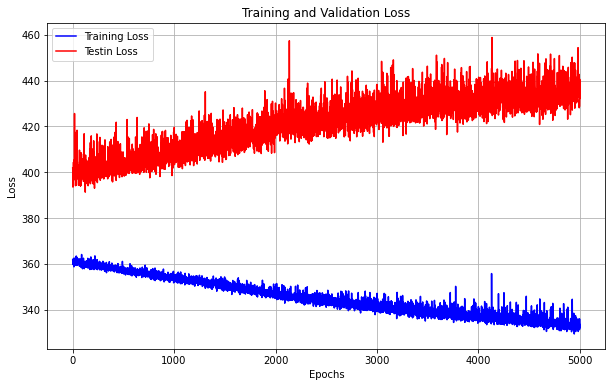

In [56]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the loss for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Testin Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [54]:
import tensorflow as tf

print("GPU is available" if tf.config.list_physical_devices('GPU') else "GPU is NOT available")


GPU is NOT available


In [42]:
# Force TensorFlow to use the GPU
tf.config.experimental.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [49]:
from tensorflow.python.client import device_lib

# Check GPU devices
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9966585405816974232
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14410383360
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4993130546461422009
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]